# Summary
- Bert's are similar to one another. ELMos are similar to one another
- No pair of transformers that similar to one another (see CKA and SVCCA similarity) except for two BERTs. More similar to ELMos
- MaxCorr, MinCorr, LinReg rankings are similar (usu. >0.7 spearman)
- All models much more correlated than random. Thus, I believe we don't need to worry about the advantage larger models have with linreging to another
- XLnet seems rather dissimilar with everything else..

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns

In [2]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/johnmwu/contextual-corr-analysis/results1_"
res_fname = {method : base + method for method in 
                {"maxcorr", "mincorr", "maxlinreg", "minlinreg", "cca", "lincka"}}

res_d = {}
res_d["maxcorr"] = json.load(open(res_fname["maxcorr"], "r"))
res_d["mincorr"] = json.load(open(res_fname["mincorr"], "r"))
res_d["maxlinreg"] = json.load(open(res_fname["maxlinreg"], "r"))
res_d["minlinreg"] = json.load(open(res_fname["minlinreg"], "r"))

network_l = [network for network in res_d["maxcorr"]]

num_neurons_d = {}
for network in network_l:
    num_neurons_d[network] = len(res_d["maxcorr"][network])

num_neurons_d

{'bert_large_cased_-1': 1024,
 'openai_transformer_-1': 768,
 'bert_base_cased_-1': 768,
 'elmo_original_-1': 1024,
 'calypso_transformer_6_512_base_-1': 1024,
 'elmo_4x4096_512_-1': 1024,
 'xlnet_large_cased_-1': 1024}

# Neuron Rankings

### Sorts

In [3]:
rk_methods = {"maxcorr", "mincorr", "maxlinreg", "minlinreg"}

In [4]:
neuron_sorts = {network: {} for network in network_l}
for network in network_l:
    for method in rk_methods:
        neuron_sorts[network][method] = [neuron[0] for neuron in res_d[method][network]]

In [5]:
# Set `rk_ar_d`, `rk_df_d`, `spearman_d`
rk_ar_d = {}
rk_df_d = {}
spearman_d = {}
for network in network_l:
    # rk_ar[method_ix, neuron] = rank
    # need to invert the permutation
    rk_ar = np.stack([
            [neuron_sorts[network][method].index(neuron) for neuron in range(len(neuron_sorts[network][method]))]
                      for method in rk_methods
    ]).T
    rk_df = pd.DataFrame(rk_ar, columns=list(rk_methods))
    
    rk_ar_d[network] = rk_ar
    rk_df_d[network] = rk_df
    spearman_d[network] = rk_df.corr()

In [6]:
for network in network_l:
    print(network)
    print(rk_ar_d[network])
    print(spearman_d[network])

bert_large_cased_-1
[[749 798 706 790]
 [ 61  65  48  71]
 [424 428 589 233]
 ...
 [432 503 325 628]
 [852 903 912 639]
 [886 814 869 841]]
           maxlinreg  minlinreg   maxcorr   mincorr
maxlinreg   1.000000   0.962166  0.801217  0.709030
minlinreg   0.962166   1.000000  0.806407  0.755764
maxcorr     0.801217   0.806407  1.000000  0.650935
mincorr     0.709030   0.755764  0.650935  1.000000
openai_transformer_-1
[[ 72  43  62  16]
 [740 698 553 484]
 [167 140  80 185]
 ...
 [749 742 695 726]
 [732 741 760 676]
 [354 350 302 108]]
           maxlinreg  minlinreg   maxcorr   mincorr
maxlinreg   1.000000   0.951954  0.818467  0.769382
minlinreg   0.951954   1.000000  0.807630  0.829628
maxcorr     0.818467   0.807630  1.000000  0.761771
mincorr     0.769382   0.829628  0.761771  1.000000
bert_base_cased_-1
[[562 572 344 529]
 [267 381 341 180]
 [452 409 409 366]
 ...
 [672 688 350 582]
 [367 230 380 162]
 [290 227 148  67]]
           maxlinreg  minlinreg   maxcorr   mincorr
maxlinr

### Distributions



bert_large_cased_-1:

maxlinreg

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.962166  0.972380
min  0.962166  1.000000  0.973766
med  0.972380  0.973766  1.000000


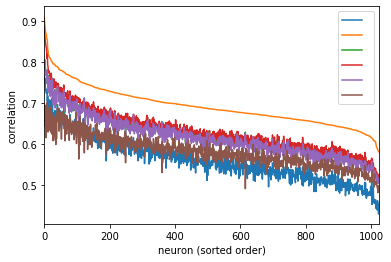

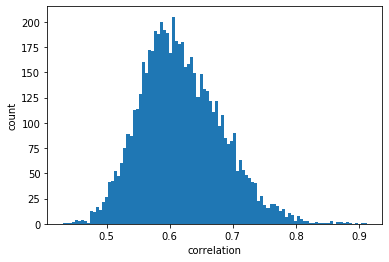


minlinreg

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.962166  0.972380
min  0.962166  1.000000  0.973766
med  0.972380  0.973766  1.000000


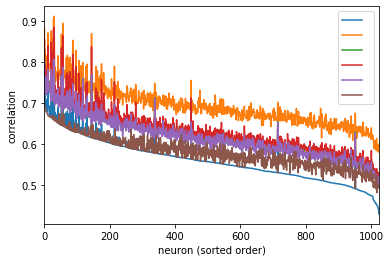

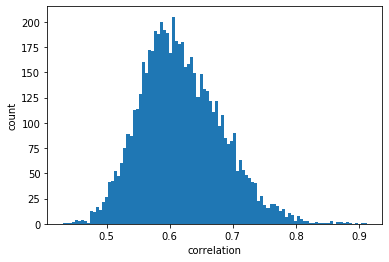


maxcorr

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.650935  0.883787
min  0.650935  1.000000  0.766982
med  0.883787  0.766982  1.000000


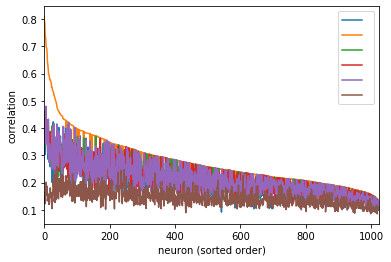

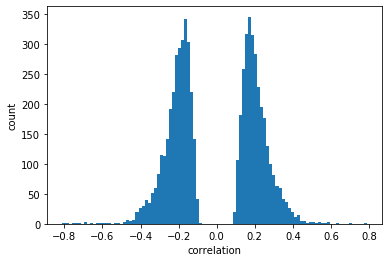


mincorr

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.650935  0.883787
min  0.650935  1.000000  0.766982
med  0.883787  0.766982  1.000000


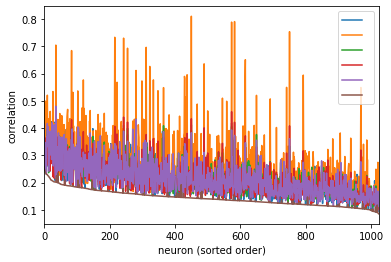

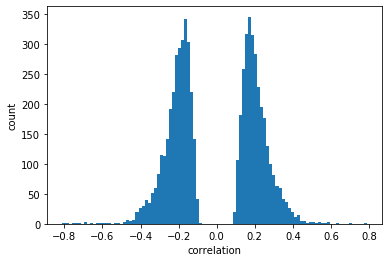



openai_transformer_-1:

maxlinreg

maxcounts
    768
dtype: int64

mincounts
    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.951954  0.990055
min  0.951954  1.000000  0.969719
med  0.990055  0.969719  1.000000


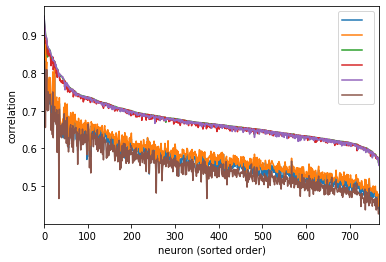

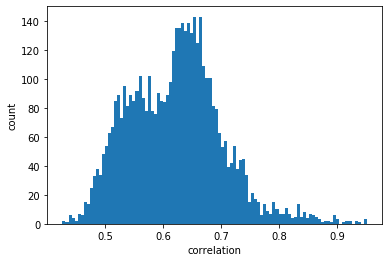


minlinreg

maxcounts
    768
dtype: int64

mincounts
    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.951954  0.990055
min  0.951954  1.000000  0.969719
med  0.990055  0.969719  1.000000


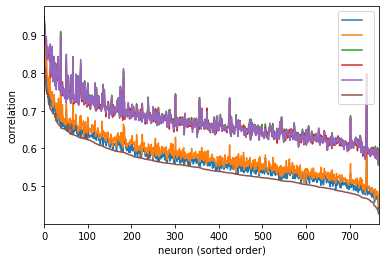

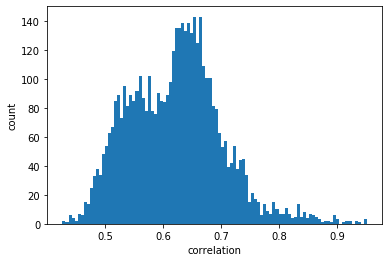


maxcorr

maxcounts
    768
dtype: int64

mincounts
    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.761771  0.912168
min  0.761771  1.000000  0.830635
med  0.912168  0.830635  1.000000


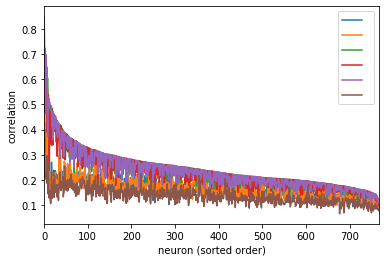

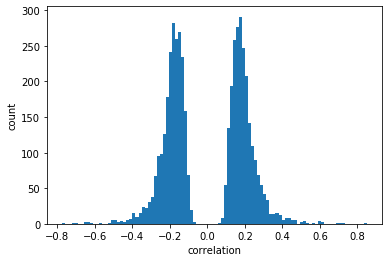


mincorr

maxcounts
    768
dtype: int64

mincounts
    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.761771  0.912168
min  0.761771  1.000000  0.830635
med  0.912168  0.830635  1.000000


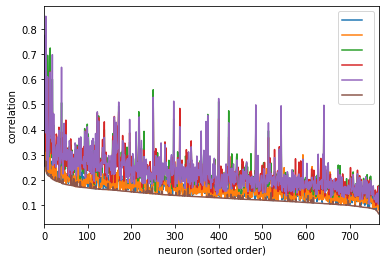

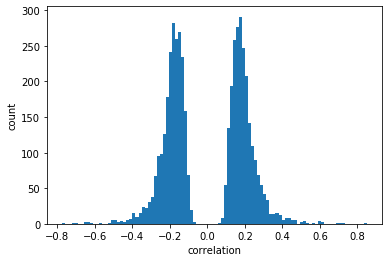



bert_base_cased_-1:

maxlinreg

maxcounts
    768
dtype: int64

mincounts
    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.919610  0.945768
min  0.919610  1.000000  0.958999
med  0.945768  0.958999  1.000000


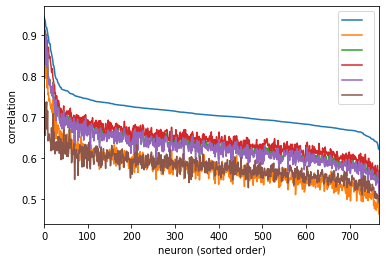

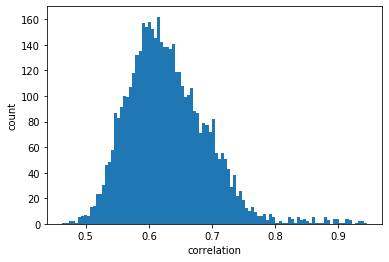


minlinreg

maxcounts
    768
dtype: int64

mincounts
    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.919610  0.945768
min  0.919610  1.000000  0.958999
med  0.945768  0.958999  1.000000


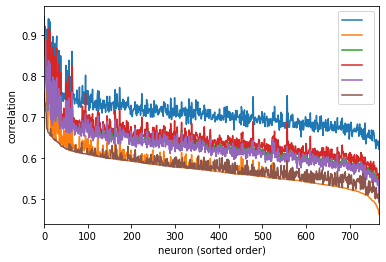

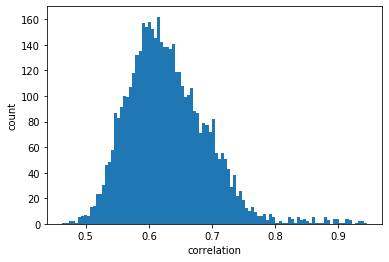


maxcorr

maxcounts
    768
dtype: int64

mincounts
    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.542408  0.824581
min  0.542408  1.000000  0.671731
med  0.824581  0.671731  1.000000


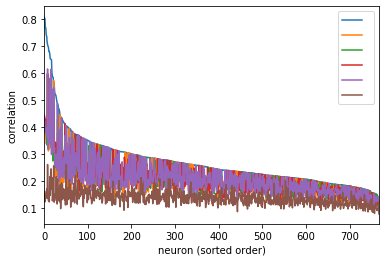

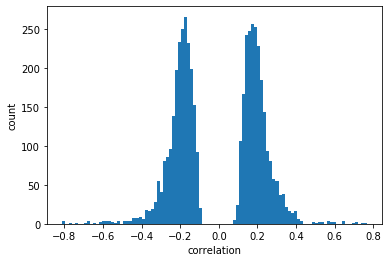


mincorr

maxcounts
    768
dtype: int64

mincounts
    768
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.542408  0.824581
min  0.542408  1.000000  0.671731
med  0.824581  0.671731  1.000000


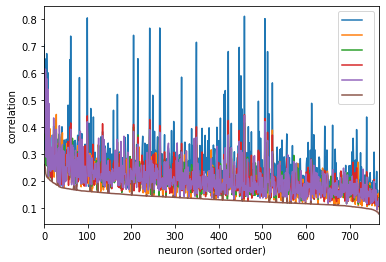

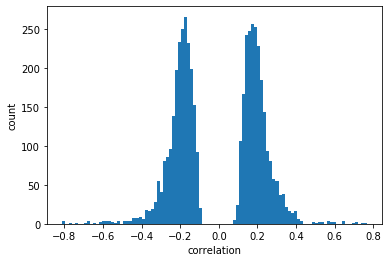



elmo_original_-1:

maxlinreg

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.754158  0.841422
min  0.754158  1.000000  0.961622
med  0.841422  0.961622  1.000000


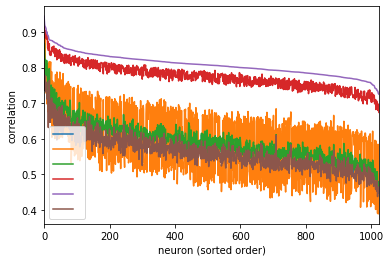

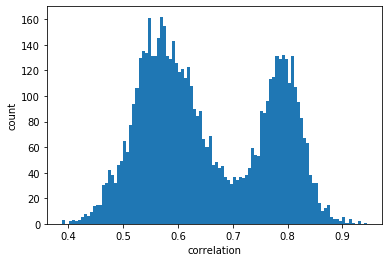


minlinreg

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.754158  0.841422
min  0.754158  1.000000  0.961622
med  0.841422  0.961622  1.000000


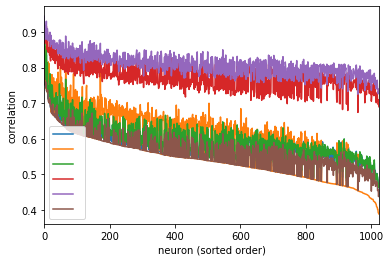

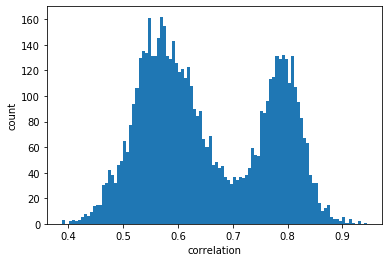


maxcorr

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.742880  0.802424
min  0.742880  1.000000  0.752801
med  0.802424  0.752801  1.000000


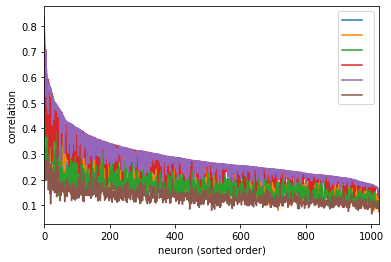

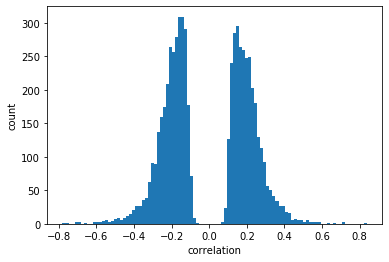


mincorr

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.742880  0.802424
min  0.742880  1.000000  0.752801
med  0.802424  0.752801  1.000000


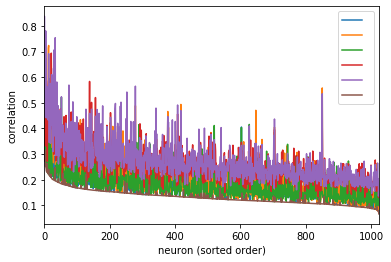

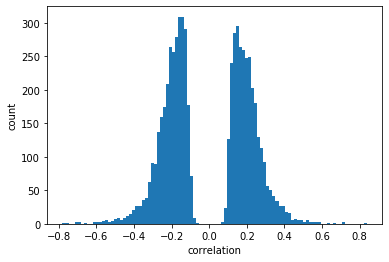



calypso_transformer_6_512_base_-1:

maxlinreg

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.520060  0.548145
min  0.520060  1.000000  0.957119
med  0.548145  0.957119  1.000000


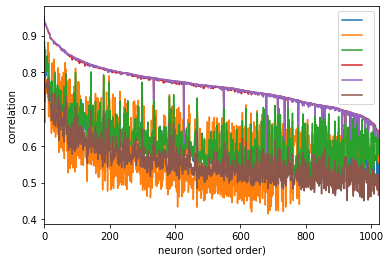

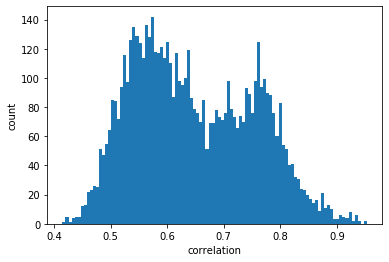


minlinreg

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.520060  0.548145
min  0.520060  1.000000  0.957119
med  0.548145  0.957119  1.000000


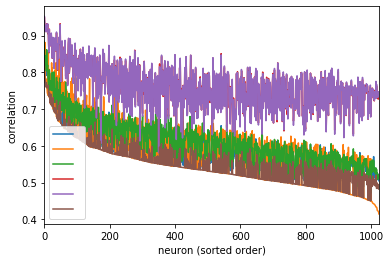

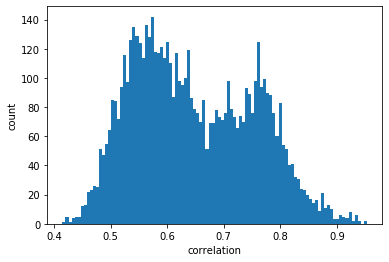


maxcorr

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.661105  0.877642
min  0.661105  1.000000  0.692308
med  0.877642  0.692308  1.000000


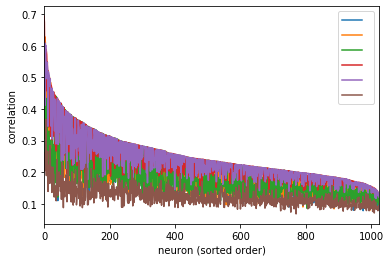

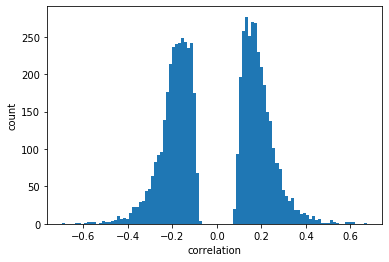


mincorr

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.661105  0.877642
min  0.661105  1.000000  0.692308
med  0.877642  0.692308  1.000000


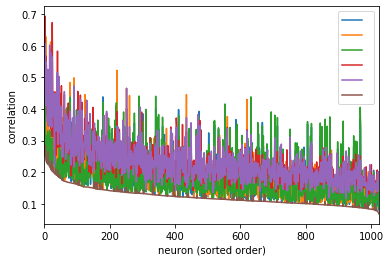

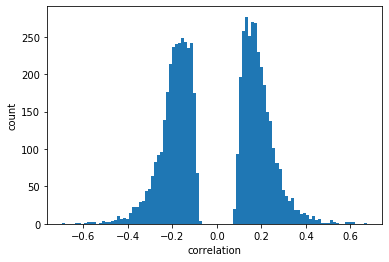



elmo_4x4096_512_-1:

maxlinreg

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.746404  0.835420
min  0.746404  1.000000  0.957081
med  0.835420  0.957081  1.000000


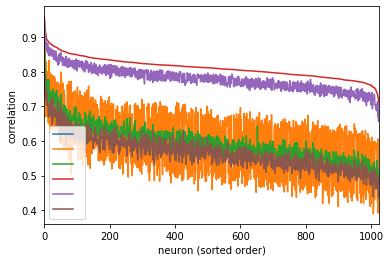

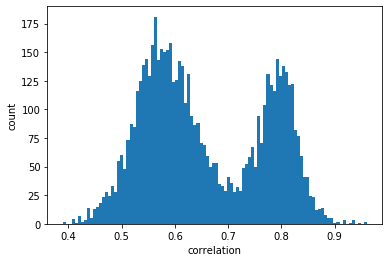


minlinreg

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.746404  0.835420
min  0.746404  1.000000  0.957081
med  0.835420  0.957081  1.000000


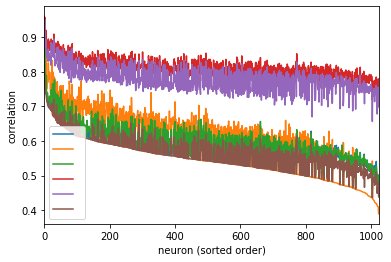

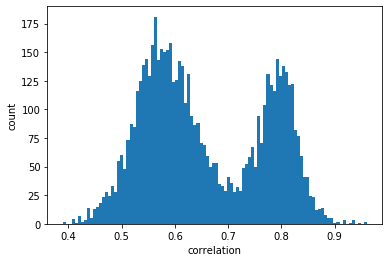


maxcorr

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.722885  0.795932
min  0.722885  1.000000  0.721365
med  0.795932  0.721365  1.000000


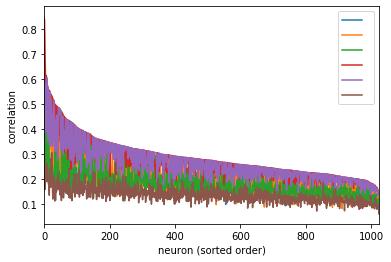

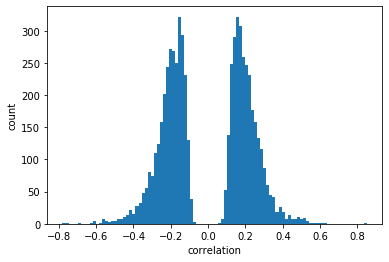


mincorr

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.722885  0.795932
min  0.722885  1.000000  0.721365
med  0.795932  0.721365  1.000000


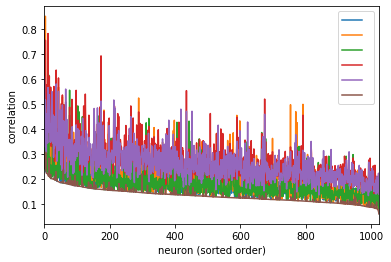

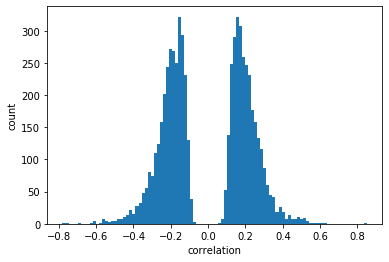



xlnet_large_cased_-1:

maxlinreg

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.944306  0.984478
min  0.944306  1.000000  0.956433
med  0.984478  0.956433  1.000000


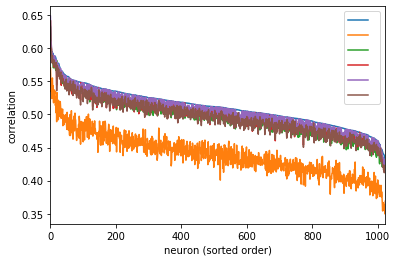

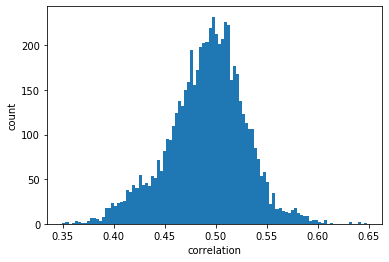


minlinreg

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.944306  0.984478
min  0.944306  1.000000  0.956433
med  0.984478  0.956433  1.000000


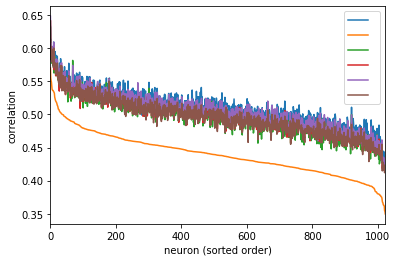

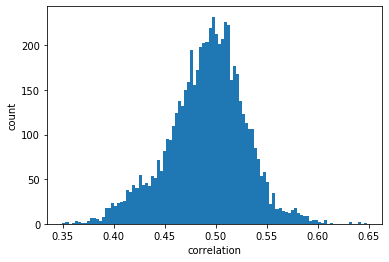


maxcorr

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.867169  0.920747
min  0.867169  1.000000  0.934095
med  0.920747  0.934095  1.000000


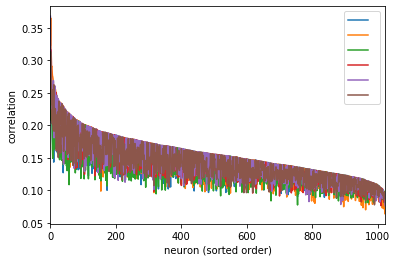

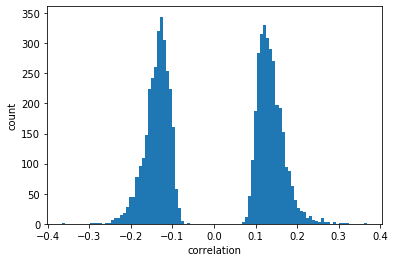


mincorr

maxcounts
    1024
dtype: int64

mincounts
    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.867169  0.920747
min  0.867169  1.000000  0.934095
med  0.920747  0.934095  1.000000


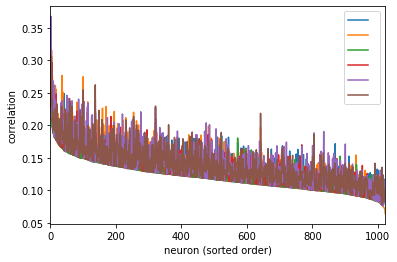

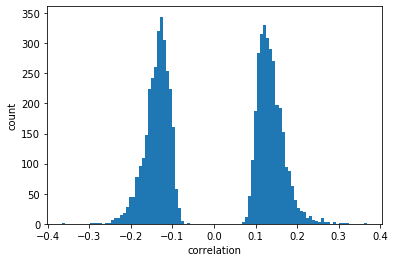

In [7]:
for network in network_l:
    print("\n\n" + network + ":")
    for method in rk_methods:
        print("\n" + method)
        corr_ar = np.stack([
            list(notated_neuron[1].values())
            for notated_neuron in res_d[method][network]
        ])
        corr_df = pd.DataFrame(np.abs(corr_ar), 
                               columns=[basename(dirname(net)) 
                                        for net in network_l if net != network])
        
        print("\nmaxcounts")
        print(corr_df.idxmax(axis=1).value_counts())
        
        print("\nmincounts")
        print(corr_df.idxmin(axis=1).value_counts())
        
        print("\ncorr_df_pctl")
        corr_df_pctl = pd.DataFrame()
        corr_df_pctl["max"] = corr_df.max(axis=1)
        corr_df_pctl["min"] = corr_df.min(axis=1)
        corr_df_pctl["med"] = corr_df.median(axis=1)
        print(corr_df_pctl.rank().corr()) # spearman
        
        corr_df.plot()
        plt.xlabel("neuron (sorted order)")
        plt.ylabel("correlation")
        plt.show()
        
        plt.hist(corr_ar.ravel(), bins=100)
        plt.xlabel("correlation")
        plt.ylabel("count")
        plt.show()

# Similarities

### CKA

In [8]:
lincka_d = torch.load(res_fname["lincka"])

In [9]:
lincka_df = pd.DataFrame(lincka_d)


In [10]:
lincka_df.rank(ascending=False)

,bert_large_cased_-1,openai_transformer_-1,bert_base_cased_-1,elmo_original_-1,calypso_transformer_6_512_base_-1,elmo_4x4096_512_-1,xlnet_large_cased_-1
bert_base_cased_-1,1.0,4.0,NaN,4.0,4.0,4.0,6.0
bert_large_cased_-1,NaN,5.0,1.0,5.0,5.0,5.0,5.0
calypso_transformer_6_512_base_-1,4.0,3.0,4.0,2.0,NaN,2.0,4.0
elmo_4x4096_512_-1,3.0,1.0,3.0,1.0,1.0,NaN,2.0
elmo_original_-1,2.0,2.0,2.0,NaN,2.0,1.0,1.0
openai_transformer_-1,5.0,NaN,5.0,3.0,3.0,3.0,3.0
xlnet_large_cased_-1,6.0,6.0,6.0,6.0,6.0,6.0,NaN


In [11]:
lincka_df.mean()

bert_large_cased_-1                  0.322870
openai_transformer_-1                0.371946
bert_base_cased_-1                   0.340041
elmo_original_-1                     0.513345
calypso_transformer_6_512_base_-1    0.408249
elmo_4x4096_512_-1                   0.513293
xlnet_large_cased_-1                 0.155804
dtype: float64

In [12]:
lincka_df.min()

bert_large_cased_-1                  0.121464
openai_transformer_-1                0.168407
bert_base_cased_-1                   0.111919
elmo_original_-1                     0.196594
calypso_transformer_6_512_base_-1    0.139940
elmo_4x4096_512_-1                   0.196502
xlnet_large_cased_-1                 0.111919
dtype: float64

### CCA

In [13]:
cca_d = torch.load(res_fname["cca"])

In [14]:
corrs, sv_similarities, pw_similarities = cca_d['corrs'], cca_d['sv_similarities'], cca_d['pw_similarities']

In [15]:
sv_sim_df = pd.DataFrame(sv_similarities)
sv_sim_df

,bert_large_cased_-1,openai_transformer_-1,bert_base_cased_-1,elmo_original_-1,calypso_transformer_6_512_base_-1,elmo_4x4096_512_-1,xlnet_large_cased_-1
bert_base_cased_-1,0.431474,0.281936,NaN,0.349746,0.360407,0.343009,0.331822
bert_large_cased_-1,NaN,0.291184,0.431474,0.290035,0.295222,0.286700,0.292010
calypso_transformer_6_512_base_-1,0.295222,0.365994,0.360407,0.521414,NaN,0.522366,0.282227
elmo_4x4096_512_-1,0.286700,0.365157,0.343009,0.556058,0.522366,NaN,0.265741
elmo_original_-1,0.290035,0.367775,0.349746,NaN,0.521414,0.556058,0.268527
openai_transformer_-1,0.291184,NaN,0.281936,0.367775,0.365994,0.365157,0.278286
xlnet_large_cased_-1,0.292010,0.278286,0.331822,0.268527,0.282227,0.265741,NaN


In [16]:
sv_sim_df.rank(ascending=False)

,bert_large_cased_-1,openai_transformer_-1,bert_base_cased_-1,elmo_original_-1,calypso_transformer_6_512_base_-1,elmo_4x4096_512_-1,xlnet_large_cased_-1
bert_base_cased_-1,1.0,5.0,NaN,4.0,4.0,4.0,1.0
bert_large_cased_-1,NaN,4.0,1.0,5.0,5.0,5.0,2.0
calypso_transformer_6_512_base_-1,2.0,2.0,2.0,2.0,NaN,2.0,3.0
elmo_4x4096_512_-1,6.0,3.0,4.0,1.0,1.0,NaN,6.0
elmo_original_-1,5.0,1.0,3.0,NaN,2.0,1.0,5.0
openai_transformer_-1,4.0,NaN,6.0,3.0,3.0,3.0,4.0
xlnet_large_cased_-1,3.0,6.0,5.0,6.0,6.0,6.0,NaN


In [17]:
pw_sim_df = pd.DataFrame(pw_similarities)
pw_sim_df

,bert_large_cased_-1,openai_transformer_-1,bert_base_cased_-1,elmo_original_-1,calypso_transformer_6_512_base_-1,elmo_4x4096_512_-1,xlnet_large_cased_-1
bert_base_cased_-1,0.532592,0.370820,NaN,0.438238,0.459786,0.434585,0.391508
bert_large_cased_-1,NaN,0.372566,0.526711,0.373982,0.387827,0.373271,0.349752
calypso_transformer_6_512_base_-1,0.388686,0.467144,0.445013,0.618954,NaN,0.622373,0.340371
elmo_4x4096_512_-1,0.377692,0.467671,0.426225,0.654520,0.617936,NaN,0.321719
elmo_original_-1,0.382415,0.470399,0.433851,NaN,0.617480,0.656871,0.325021
openai_transformer_-1,0.378940,NaN,0.365713,0.451934,0.455690,0.451343,0.330613
xlnet_large_cased_-1,0.380717,0.358168,0.413595,0.350614,0.368806,0.351131,NaN


In [18]:
pw_sim_df.rank(ascending=False)

,bert_large_cased_-1,openai_transformer_-1,bert_base_cased_-1,elmo_original_-1,calypso_transformer_6_512_base_-1,elmo_4x4096_512_-1,xlnet_large_cased_-1
bert_base_cased_-1,1.0,5.0,NaN,4.0,3.0,4.0,1.0
bert_large_cased_-1,NaN,4.0,1.0,5.0,5.0,5.0,2.0
calypso_transformer_6_512_base_-1,2.0,3.0,2.0,2.0,NaN,2.0,3.0
elmo_4x4096_512_-1,6.0,2.0,4.0,1.0,1.0,NaN,6.0
elmo_original_-1,3.0,1.0,3.0,NaN,2.0,1.0,5.0
openai_transformer_-1,5.0,NaN,6.0,3.0,4.0,3.0,4.0
xlnet_large_cased_-1,4.0,6.0,5.0,6.0,6.0,6.0,NaN


In [19]:
corrs_df = pd.DataFrame(corrs)
corrs_df

,bert_large_cased_-1,openai_transformer_-1,bert_base_cased_-1,elmo_original_-1,calypso_transformer_6_512_base_-1,elmo_4x4096_512_-1,xlnet_large_cased_-1
bert_base_cased_-1,"[tensor(0.9803), tensor(0.9689), tensor(0.9639...","[tensor(0.9497), tensor(0.9438), tensor(0.9302...",NaN,"[tensor(0.9758), tensor(0.9612), tensor(0.9540...","[tensor(0.9685), tensor(0.9666), tensor(0.9507...","[tensor(0.9751), tensor(0.9598), tensor(0.9513...","[tensor(0.9366), tensor(0.9223), tensor(0.9124..."
bert_large_cased_-1,NaN,"[tensor(0.9358), tensor(0.9330), tensor(0.9187...","[tensor(0.9803), tensor(0.9689), tensor(0.9639...","[tensor(0.9758), tensor(0.9494), tensor(0.9425...","[tensor(0.9681), tensor(0.9608), tensor(0.9408...","[tensor(0.9755), tensor(0.9485), tensor(0.9409...","[tensor(0.9333), tensor(0.9148), tensor(0.9077..."
calypso_transformer_6_512_base_-1,"[tensor(0.9681), tensor(0.9608), tensor(0.9408...","[tensor(0.9596), tensor(0.9571), tensor(0.9512...","[tensor(0.9685), tensor(0.9666), tensor(0.9507...","[tensor(0.9877), tensor(0.9816), tensor(0.9807...",NaN,"[tensor(0.9880), tensor(0.9820), tensor(0.9812...","[tensor(0.9392), tensor(0.9261), tensor(0.9150..."
elmo_4x4096_512_-1,"[tensor(0.9755), tensor(0.9485), tensor(0.9409...","[tensor(0.9701), tensor(0.9688), tensor(0.9637...","[tensor(0.9751), tensor(0.9598), tensor(0.9513...","[tensor(0.9932), tensor(0.9907), tensor(0.9898...","[tensor(0.9880), tensor(0.9820), tensor(0.9812...",NaN,"[tensor(0.9412), tensor(0.9286), tensor(0.9198..."
elmo_original_-1,"[tensor(0.9758), tensor(0.9494), tensor(0.9425...","[tensor(0.9719), tensor(0.9681), tensor(0.9627...","[tensor(0.9758), tensor(0.9612), tensor(0.9540...",NaN,"[tensor(0.9877), tensor(0.9816), tensor(0.9807...","[tensor(0.9932), tensor(0.9907), tensor(0.9898...","[tensor(0.9428), tensor(0.9292), tensor(0.9198..."
openai_transformer_-1,"[tensor(0.9358), tensor(0.9330), tensor(0.9187...",NaN,"[tensor(0.9497), tensor(0.9438), tensor(0.9302...","[tensor(0.9719), tensor(0.9681), tensor(0.9627...","[tensor(0.9596), tensor(0.9571), tensor(0.9512...","[tensor(0.9701), tensor(0.9688), tensor(0.9637...","[tensor(0.9330), tensor(0.9174), tensor(0.8869..."
xlnet_large_cased_-1,"[tensor(0.9333), tensor(0.9148), tensor(0.9077...","[tensor(0.9330), tensor(0.9174), tensor(0.8869...","[tensor(0.9366), tensor(0.9223), tensor(0.9124...","[tensor(0.9428), tensor(0.9292), tensor(0.9198...","[tensor(0.9392), tensor(0.9261), tensor(0.9150...","[tensor(0.9412), tensor(0.9286), tensor(0.9198...",NaN


In [20]:
maxcorrs_df = corrs_df.applymap(lambda t: float('nan') if type(t) is float else t.max().item())
maxcorrs_df

,bert_large_cased_-1,openai_transformer_-1,bert_base_cased_-1,elmo_original_-1,calypso_transformer_6_512_base_-1,elmo_4x4096_512_-1,xlnet_large_cased_-1
bert_base_cased_-1,0.980303,0.949734,NaN,0.975784,0.968454,0.975090,0.936583
bert_large_cased_-1,NaN,0.935789,0.980303,0.975796,0.968141,0.975460,0.933265
calypso_transformer_6_512_base_-1,0.968141,0.959551,0.968454,0.987678,NaN,0.987984,0.939206
elmo_4x4096_512_-1,0.975460,0.970072,0.975090,0.993198,0.987984,NaN,0.941241
elmo_original_-1,0.975796,0.971898,0.975784,NaN,0.987678,0.993198,0.942801
openai_transformer_-1,0.935789,NaN,0.949734,0.971898,0.959551,0.970072,0.932964
xlnet_large_cased_-1,0.933265,0.932964,0.936583,0.942801,0.939206,0.941241,NaN


In [21]:
maxcorrs_df.rank(ascending=False)

,bert_large_cased_-1,openai_transformer_-1,bert_base_cased_-1,elmo_original_-1,calypso_transformer_6_512_base_-1,elmo_4x4096_512_-1,xlnet_large_cased_-1
bert_base_cased_-1,1.0,4.0,NaN,4.0,3.0,4.0,4.0
bert_large_cased_-1,NaN,5.0,1.0,3.0,4.0,3.0,5.0
calypso_transformer_6_512_base_-1,4.0,3.0,4.0,2.0,NaN,2.0,3.0
elmo_4x4096_512_-1,3.0,2.0,3.0,1.0,1.0,NaN,2.0
elmo_original_-1,2.0,1.0,2.0,NaN,2.0,1.0,1.0
openai_transformer_-1,5.0,NaN,5.0,5.0,5.0,5.0,6.0
xlnet_large_cased_-1,6.0,6.0,6.0,6.0,6.0,6.0,NaN


### Heatmaps

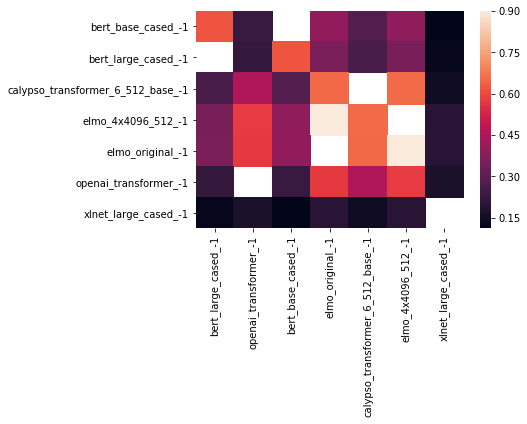

In [36]:
# lincka
sns.heatmap(lincka_df.reindex(sorted(lincka_df.columns), axis=1))

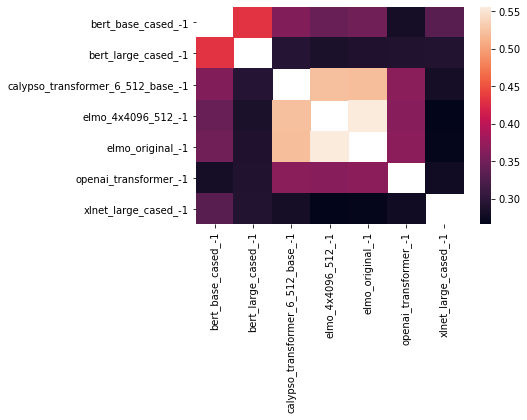

In [41]:
# sv_similarities
sns.heatmap(sv_sim_df.reindex(sorted(sv_sim_df.columns), axis=1))

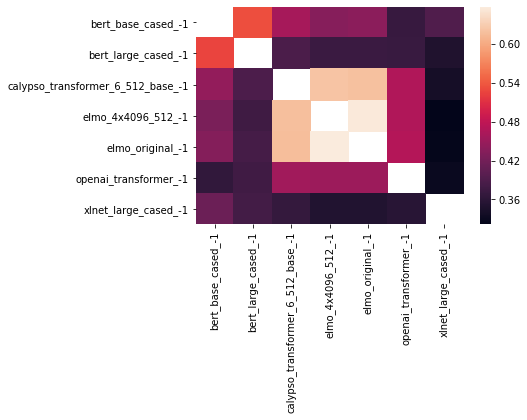

In [42]:
# pw_similarities
sns.heatmap(pw_sim_df.reindex(sorted(pw_sim_df.columns), axis=1))